# Logistic Regression

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing dataset

In [2]:
dataset=pd.read_csv('Instagram Ads Logistic Regression.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Splitting the dataset into Training & Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [6]:
print(X_train)

[[ 0.30645937 -0.72727353]
 [-0.55054887 -1.66795146]
 [-1.40755711 -0.83799034]
 [ 0.55131887  1.5136215 ]
 [ 0.30645937 -0.47828519]
 [-1.16269761  0.24095912]
 [-1.8972761  -0.94862416]
 [ 1.04103786 -0.11866304]
 [-0.06082987 -0.72727353]
 [ 0.06159987 -0.5336436 ]
 [-0.18325962 -0.20165915]
 [-1.04026786 -0.56128131]
 [-0.18325962 -0.78263194]
 [ 0.79617836  0.01969148]
 [-0.18325962 -0.56128131]
 [ 0.30645937 -0.09102533]
 [ 2.26533534  0.8219319 ]
 [ 0.30645937 -0.50600589]
 [ 1.53075685 -1.2252502 ]
 [ 0.79617836  1.07092024]
 [ 0.91860811  1.81788525]
 [-0.55054887  1.15391635]
 [-0.18325962  0.8219319 ]
 [-1.28512736 -1.41896313]
 [ 0.79617836  0.10268759]
 [-0.79540836 -1.39124243]
 [-0.79540836 -0.97626187]
 [-0.18325962 -0.17402145]
 [-0.18325962  1.81788525]
 [ 0.18402962 -0.20165915]
 [-0.18325962 -0.50600589]
 [-0.06082987 -0.00802922]
 [-1.16269761 -1.75094758]
 [-0.06082987  0.04732919]
 [ 0.42888912  0.04732919]
 [-1.52998685 -1.66795146]
 [ 0.30645937 -0.58900201]
 

In [7]:
print(y_test)

[0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0
 1 0 0]


## Logistic Regression Training on Training set

In [8]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=42)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=42)

## Predicting

In [9]:
print(classifier.predict(sc.transform([[54,41000]])))

[1]


## Predicting Test set results

In [11]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1))))

[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]


## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[23  2]
 [ 3 12]]


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

## Visualizing Training Set results

<ipython-input-16-3277c112bab0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


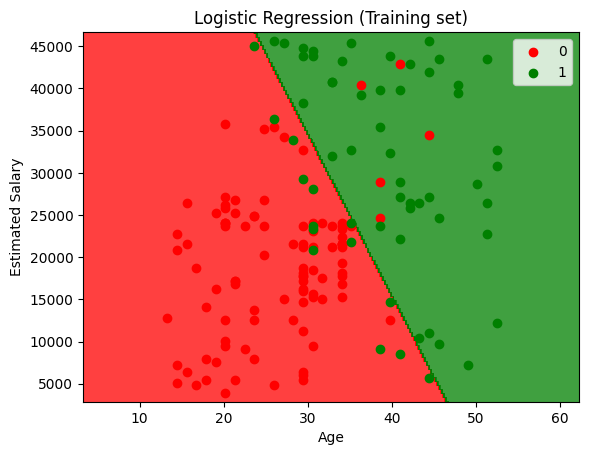

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising Test set results

<ipython-input-17-53d83417cfe6>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


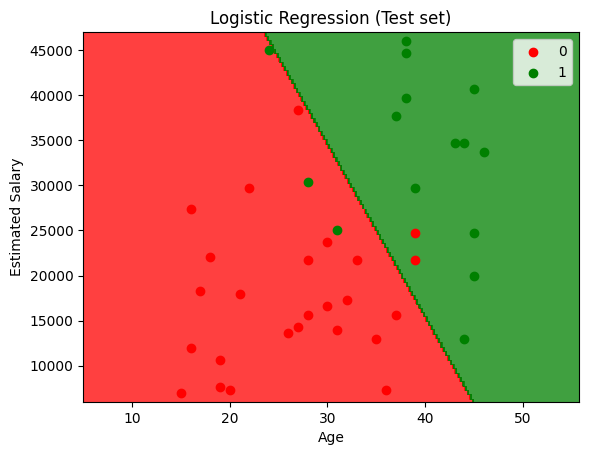

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()